In [444]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import seaborn as sns# Carregando dataset


In [445]:
data = pd.read_csv("Base_Completa.csv", sep = ';', encoding = 'iso-8859-1', squeeze = True)
#data.describe()

C:\Users\Kimbelly\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (89) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


143.90002965927124
Index(['ID_PROVA_BRASIL', 'ID_UF', 'ID_MUNICIPIO', 'ID_ESCOLA',
       'ID_DEPENDENCIA_ADM', 'ID_LOCALIZACAO', 'PC_FORMACAO_DOCENTE_INICIAL',
       'PC_FORMACAO_DOCENTE_FINAL', 'PC_FORMACAO_DOCENTE_MEDIO',
       'NIVEL_SOCIO_ECONOMICO',
       ...
       'IN_ESP_EXCLUSIVA_EJA_MEDIO', 'IN_ESP_EXCLUSIVA_EJA_PROF',
       'IN_COMUM_PROF', 'IN_ESP_EXCLUSIVA_PROF', 'cod', 'regiao', 'NM_UF',
       'Capital', 'NM_UF_SIGLA', 'MEDIA_TOTAL_5EF'],
      dtype='object', length=258)


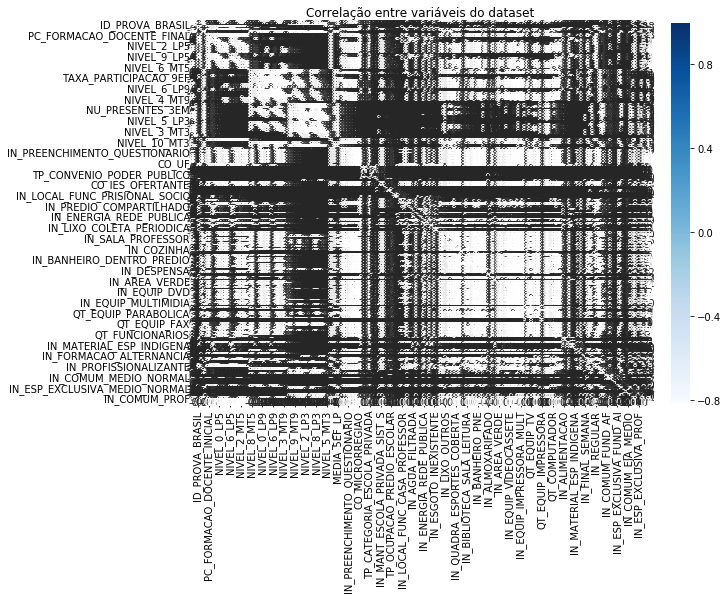

In [446]:
import matplotlib.pyplot as plt
import seaborn as sns
#hora 
import time
#import timeit
start = time.time ()

df = data
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(),
            annot = True,
            fmt = '.2f',
            cmap='Blues')
plt.title('Correlação entre variáveis do dataset')
end = time.time ()
print (end-start)
#plt.show()
print(df.columns)

In [447]:
for x in df.columns:
    print(x)

ID_PROVA_BRASIL
ID_UF
ID_MUNICIPIO
ID_ESCOLA
ID_DEPENDENCIA_ADM
ID_LOCALIZACAO
PC_FORMACAO_DOCENTE_INICIAL
PC_FORMACAO_DOCENTE_FINAL
PC_FORMACAO_DOCENTE_MEDIO
NIVEL_SOCIO_ECONOMICO
NU_MATRICULADOS_CENSO_5EF
NU_PRESENTES_5EF
TAXA_PARTICIPACAO_5EF
NIVEL_0_LP5
NIVEL_1_LP5
NIVEL_2_LP5
NIVEL_3_LP5
NIVEL_4_LP5
NIVEL_5_LP5
NIVEL_6_LP5
NIVEL_7_LP5
NIVEL_8_LP5
NIVEL_9_LP5
NIVEL_0_MT5
NIVEL_1_MT5
NIVEL_2_MT5
NIVEL_3_MT5
NIVEL_4_MT5
NIVEL_5_MT5
NIVEL_6_MT5
NIVEL_7_MT5
NIVEL_8_MT5
NIVEL_9_MT5
NIVEL_10_MT5
NU_MATRICULADOS_CENSO_9EF
NU_PRESENTES_9EF
TAXA_PARTICIPACAO_9EF
NIVEL_0_LP9
NIVEL_1_LP9
NIVEL_2_LP9
NIVEL_3_LP9
NIVEL_4_LP9
NIVEL_5_LP9
NIVEL_6_LP9
NIVEL_7_LP9
NIVEL_8_LP9
NIVEL_0_MT9
NIVEL_1_MT9
NIVEL_2_MT9
NIVEL_3_MT9
NIVEL_4_MT9
NIVEL_5_MT9
NIVEL_6_MT9
NIVEL_7_MT9
NIVEL_8_MT9
NIVEL_9_MT9
NU_MATRICULADOS_CENSO_3EM
NU_PRESENTES_3EM
TAXA_PARTICIPACAO_3EM
NIVEL_0_LP3
NIVEL_1_LP3
NIVEL_2_LP3
NIVEL_3_LP3
NIVEL_4_LP3
NIVEL_5_LP3
NIVEL_6_LP3
NIVEL_7_LP3
NIVEL_8_LP3
NIVEL_0_MT3
NIVEL_1_MT3
NIVEL_2_MT3

In [448]:
columnstaxapartic=["TAXA_PARTICIPACAO_5EF","TAXA_PARTICIPACAO_9EF","TAXA_PARTICIPACAO_3EM"]

#df = df.drop(df[(df['TAXA_PARTICIPACAO_5EF'] <= 0) or (df["TAXA_PARTICIPACAO_9EF"].empty)].index)
df = df.drop(df[(df['TAXA_PARTICIPACAO_5EF'] <= 0)].index)
#df[('TAXA_PARTICIPACAO_5EF')]
df.shape

(47771, 258)

In [449]:
#df["TAXA_PARTICIPACAO_5EF"]

In [450]:
#Feature Importance
#X = data.data 

#X = df[[ 'IN_LABORATORIO_INFORMATICA','IN_BIBLIOTECA', 'IN_AGUA_FILTRADA', 'IN_ENERGIA_REDE_PUBLICA','IN_AGUA_INEXISTENTE','IN_ESGOTO_INEXISTENTE','IN_QUADRA_ESPORTES', 'IN_SALA_LEITURA','IN_BIBLIOTECA_SALA_LEITURA', 'IN_INTERNET']]
#X = df
X = df[['IN_AGUA_FILTRADA','IN_AGUA_REDE_PUBLICA','IN_AGUA_POCO_ARTESIANO','IN_AGUA_CACIMBA'
,'IN_AGUA_FONTE_RIO','IN_AGUA_INEXISTENTE','IN_ENERGIA_REDE_PUBLICA','IN_ENERGIA_GERADOR'
,'IN_ENERGIA_OUTROS','IN_ENERGIA_INEXISTENTE','IN_ESGOTO_REDE_PUBLICA','IN_ESGOTO_FOSSA'
,'IN_ESGOTO_INEXISTENTE','IN_LIXO_COLETA_PERIODICA','IN_LIXO_QUEIMA'
,'IN_LIXO_JOGA_OUTRA_AREA','IN_LIXO_RECICLA','IN_LIXO_ENTERRA','IN_LIXO_OUTROS'
,'IN_SALA_DIRETORIA','IN_SALA_PROFESSOR','IN_LABORATORIO_INFORMATICA'
,'IN_LABORATORIO_CIENCIAS','IN_SALA_ATENDIMENTO_ESPECIAL','IN_QUADRA_ESPORTES_COBERTA'
,'IN_QUADRA_ESPORTES_DESCOBERTA','IN_QUADRA_ESPORTES','IN_COZINHA','IN_BIBLIOTECA'
,'IN_SALA_LEITURA','IN_BIBLIOTECA_SALA_LEITURA','IN_PARQUE_INFANTIL','IN_BERCARIO'
,'IN_BANHEIRO_FORA_PREDIO','IN_BANHEIRO_DENTRO_PREDIO','IN_BANHEIRO_EI','IN_BANHEIRO_PNE'
,'IN_DEPENDENCIAS_PNE','IN_SECRETARIA','IN_BANHEIRO_CHUVEIRO','IN_REFEITORIO','IN_DESPENSA'
,'IN_ALMOXARIFADO'
,'IN_AUDITORIO','IN_PATIO_COBERTO','IN_PATIO_DESCOBERTO'
,'IN_ALOJAM_ALUNO','IN_ALOJAM_PROFESSOR','IN_AREA_VERDE','IN_LAVANDERIA'
,'IN_DEPENDENCIAS_OUTRAS'
,'QT_SALAS_EXISTENTES','QT_SALAS_UTILIZADAS'
,'IN_EQUIP_TV','IN_EQUIP_VIDEOCASSETE','IN_EQUIP_DVD','IN_EQUIP_PARABOLICA'
,'IN_EQUIP_COPIADORA','IN_EQUIP_RETROPROJETOR'
,'IN_EQUIP_IMPRESSORA','IN_EQUIP_IMPRESSORA_MULT'
,'IN_EQUIP_SOM','IN_EQUIP_MULTIMIDIA'
,'IN_EQUIP_FAX','IN_EQUIP_FOTO'
,'IN_COMPUTADOR','QT_EQUIP_TV','QT_EQUIP_VIDEOCASSETE','QT_EQUIP_DVD','QT_EQUIP_PARABOLICA'
,'QT_EQUIP_COPIADORA','QT_EQUIP_RETROPROJETOR'
,'QT_EQUIP_IMPRESSORA','QT_EQUIP_IMPRESSORA_MULT','QT_EQUIP_SOM'
,'QT_EQUIP_MULTIMIDIA','QT_EQUIP_FAX','QT_EQUIP_FOTO','QT_COMPUTADOR'
,'QT_COMP_ALUNO','IN_INTERNET','IN_BANDA_LARGA','QT_FUNCIONARIOS'
,'IN_ALIMENTACAO'
,'TP_AEE'
,'TP_ATIVIDADE_COMPLEMENTAR'
,'IN_FUNDAMENTAL_CICLOS'
,'TP_LOCALIZACAO_DIFERENCIADA'
,'IN_MATERIAL_ESP_QUILOMBOLA'
,'IN_MATERIAL_ESP_INDIGENA'
,'IN_MATERIAL_ESP_NAO_UTILIZA'
,'IN_EDUCACAO_INDIGENA'
,'TP_INDIGENA_LINGUA'
,'CO_LINGUA_INDIGENA'
,'IN_BRASIL_ALFABETIZADO'
,'IN_FINAL_SEMANA'
,'IN_FORMACAO_ALTERNANCIA'
,'IN_MEDIACAO_PRESENCIAL'
,'IN_MEDIACAO_SEMIPRESENCIAL'
,'IN_MEDIACAO_EAD'
,'IN_ESPECIAL_EXCLUSIVA'
,'IN_REGULAR'
,'IN_EJA'
,'IN_PROFISSIONALIZANTE'
,'IN_COMUM_CRECHE'
,'IN_COMUM_PRE'
,'IN_COMUM_FUND_AI'
,'IN_COMUM_FUND_AF'
,'IN_COMUM_MEDIO_MEDIO'
,'IN_COMUM_MEDIO_INTEGRADO'
,'IN_COMUM_MEDIO_NORMAL'
,'IN_ESP_EXCLUSIVA_CRECHE'
,'IN_ESP_EXCLUSIVA_PRE'
,'IN_ESP_EXCLUSIVA_FUND_AI'
,'IN_ESP_EXCLUSIVA_FUND_AF'
,'IN_ESP_EXCLUSIVA_MEDIO_MEDIO'
,'IN_ESP_EXCLUSIVA_MEDIO_INTEGR'
,'IN_ESP_EXCLUSIVA_MEDIO_NORMAL'
,'IN_COMUM_EJA_FUND'
,'IN_COMUM_EJA_MEDIO'
,'IN_COMUM_EJA_PROF'
,'IN_ESP_EXCLUSIVA_EJA_FUND'
,'IN_ESP_EXCLUSIVA_EJA_MEDIO'
,'IN_ESP_EXCLUSIVA_EJA_PROF'
,'IN_COMUM_PROF'
,'IN_ESP_EXCLUSIVA_PROF']]

df['rotulo'] = list(map(lambda x : 1 if x>300 else 0, df.loc[:,'MEDIA_TOTAL_5EF']))
y = df['rotulo']

#y = df.target# Criando conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)# Treinando modelo

df['rotulo'] = list(map(lambda x : 1 if x>300 else 0, df.loc[:,'MEDIA_TOTAL_5EF']))
y = df['rotulo']

In [451]:
model  = RandomForestClassifier()
model.fit(X_train, y_train)# Mostrando importância de cada feature
model.feature_importances_

C:\Users\Kimbelly\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([4.37822720e-03, 1.35054740e-02, 5.68661956e-03, 8.24175148e-03,
       4.23657171e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.09901082e-02, 6.51316058e-03,
       0.00000000e+00, 8.93073221e-03, 3.90180574e-03, 8.54512906e-03,
       1.41201605e-03, 1.15360964e-03, 0.00000000e+00, 5.26812772e-03,
       1.68797080e-02, 9.55133537e-03, 3.30835587e-05, 9.30965301e-03,
       7.96491478e-03, 5.06088342e-03, 7.38079736e-03, 1.14287716e-04,
       2.13339375e-02, 9.28254137e-03, 1.12191386e-02, 8.98462315e-03,
       4.03918533e-03, 5.39444433e-03, 9.03285585e-04, 9.98513839e-03,
       9.94175068e-03, 9.12654783e-03, 6.77052052e-03, 6.90573369e-03,
       1.03809381e-02, 5.83067718e-03, 1.25460775e-02, 4.01195912e-03,
       1.54301459e-02, 2.92026019e-03, 3.88550193e-04, 0.00000000e+00,
       8.74812891e-03, 1.62602018e-03, 0.00000000e+00, 4.17186486e-02,
       4.80957860e-02, 4.90265760e-03, 3.31395544e-03, 8.69306293e-03,
      

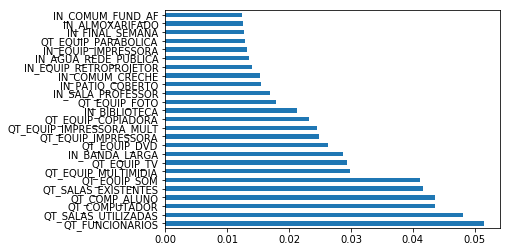

In [452]:
#importances = pd.Series(df=model.feature_importances_, index=df.feature_names)
#importances = pd.Series(df=model.feature_importances_, index=df.columns)
#columns = df[[ 'IN_LABORATORIO_INFORMATICA','IN_BIBLIOTECA', 'IN_AGUA_FILTRADA', 'IN_ENERGIA_REDE_PUBLICA','IN_AGUA_INEXISTENTE','IN_ESGOTO_INEXISTENTE','IN_QUADRA_ESPORTES', 'IN_SALA_LEITURA','IN_BIBLIOTECA_SALA_LEITURA', 'IN_INTERNET']]
importances = pd.Series(model.feature_importances_, X.columns)
importances.nlargest(25).plot(kind='barh')
#sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada feature')

In [453]:
#Sklearn SelectKBest
#Uma outra forma de selecionar features é através de testes estatítisticos univariados — 
#do Inglês univariate statistical test. 
#A função SelectKBest do sklearn é um bom exemplo disso. 
#Seu funcionamento é bem simples: você informa para a função que quer selecionar 
#apenas a K maiores features do seu dataset com base em um teste estatístico.
from sklearn.datasets import load_iris
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

#data = load_iris()
#X = data.data
#y = data.target
X = SelectKBest(chi2, k=2).fit_transform(X, y)

In [454]:
#Sklearn RFE
#— Recursive Feature Elimination — ,
#o RFE funciona da seguinte forma: ele irá treinar seu modelo
#utilizando todo seu conjunto inicial, com todas as features e data points que vierem nele. 
#Após o primeiro treino, o RFE irá verificar a importâncias das features 
#— utilizando atributos como coef_ ou feature_importances_ — e, recursivamente,
#irá remover as features menos importantes do dataset e treinar o modelo novamente. 
#Ele fará isso até chegar a um número ideal de features. 
from sklearn.datasets import load_iris
from sklearn.svm import LinearSVC
from sklearn.feature_selection import RFE
#data = load_iris()
dje = data
#X = data.data
#y = data.target
# 
model = LinearSVC()
rfe = RFE(model, step=1).fit(X, y)

C:\Users\Kimbelly\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [455]:
#Sklearn SelectFromModel
#O SelectFromModel é uma outra função do sklearn que funciona da seguinte forma: 
#a partir de um modelo (fittado ou não), 
#o SFM irá remover todas as features que não passem do threshold
#que você informa em seus argumentos. 
#Essa função soou familiar? 
#De fato, o funcionamento do SelectFromModel é bem parecido com o RFE, contudo,
#o SFM é menos robusto, já que ele baseia sua seleção apenas no threshold informado, 
#enquanto o RFE recursivamente remove as features através de iterações.

In [456]:
from ipykernel import kernelapp as app

feature_importances = pd.Series(model.feature_importances_, index=X.columns)
print(feature_importances)
feature_importances.sort_values(inplace=True)
feature_importances.plot(kind='barh', figsize=(7,6))

AttributeError: 'LinearSVC' object has no attribute 'feature_importances_'

In [ ]:
#para implementar substituindo o tempo de cada algoritmo para executar a classificação no machine learning
import matplotlib.pyplot as plt
hor1=22.56768012046814
hor2=44.2
hor4=22.3
x=["hor1","hor2","hor4"]
y=[hor1,hor2,hor4]
plt.title("Tempo de execução por algoritmo")
plt.ylabel("tempo em segundos")
plt.xlabel("nome do algoritmo")
plt.bar(x,y)
plt.show( )